In [1]:
# 데이터 분석
import pandas as pd
import numpy as np

In [2]:
# 시각화
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

from wordcloud import WordCloud


In [3]:
# 정규표현식
import re

In [4]:
# 형태소 분석
from konlpy.tag import Okt

In [5]:
# 벡터화
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [123]:
# 토픽모델링
from sklearn.decomposition import LatentDirichletAllocation


In [289]:
# 군집화
from sklearn.cluster import KMeans
# 차원축소
from sklearn.manifold import TSNE

In [104]:
# 진행률 표시
from tqdm import tqdm
tqdm.pandas()

In [91]:
# 정규 표현식을 사용하여 한글만 추출
def extract_korean(text):

    # 한글과 공백만 추출
    text = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣\s]','',text)
    # 공백 2개 이상인경우 1개로 변환
    text = re.sub(r'\s+',' ',text)

    return text

In [92]:
# 형태소 분석 및 특정 품사 추출 함수
def extract_pos(text) :
    okt = Okt()
    pos_data = okt.pos(text)
    adj = ' '.join([word for word, tag in pos_data if tag in ['Adjective']])
    verb = ' '.join([word for word, tag in pos_data if tag in ['Verb']])
    noun = ' '.join([word for word, tag in pos_data if tag in ['Noun']])
    exclamation = ' '.join([word for word, tag in pos_data if tag in ['Exclamation']])
    
    # 각 품사에 대해 값이 없는 경우 NaN 할당
    adj = adj if adj else np.nan
    verb = verb if verb else np.nan
    noun = noun if noun else np.nan
    exclamation = exclamation if exclamation else np.nan
    
    return adj, verb, noun, exclamation     

In [79]:
font_path = r'c:\windows\Fonts\malgun.ttf'
stopwords = []

def display_word_cloud(data,weight=None,/,*,width=1200, height=500, stopwords=[],mask=None) :
    wordcloud = WordCloud(
        font_path=font_path,
        width=width,
        height=height,    
        random_state=2024,
#         background_color='#fff',
        stopwords=stopwords,  # 불용어 제거
        mask=mask,
    ).generate(data)
    
    # 가중치가 있으면 반영
    if weight is not None:
        wordcloud.generate_from_frequencies(weight)
        ㅁ
#     plt.figure()
#     plt.imshow(wordcloud, interpolation="bilinear")
#     plt.axis("off")
#     plt.show()
    return wordcloud

In [7]:
# 음식 리뷰
corpus = [
    "샐러드 맛이 깔끔해서 좋아요.",
    "주문한 음식이 늦게 와서 배고팠어요.",
    "피자가 맛있어요.",
    "라면이 너무 짜게 나왔어요.",
    "배달된 치킨이 맛있어요.",
    "메뉴 설명보다 양이 적어요.",
    "주문한 음식이 다른 것으로 와서 다시 주문했어요.",
    "맛은 좋은데 양이 좀 적은 편이에요.",
    "떡볶이의 매운맛이 적절해요.",
    "초밥이 신선해서 좋았어요.",
    "빵이 부드럽고 맛있네요!",
    "스테이크가 너무 질겼어요.",
    "샐러드의 드레싱이 너무 강했어요.",
    "나초의 치즈소스가 맛있었어요.",
    "파스타가 약간 덜 익은 것 같아요.",
    "커피가 너무 진해서 물을 더 추가했어요.",
    "디저트는 달지 않아서 좋았습니다.",
    "음료가 너무 달아서 다음엔 당도 조절할게요.",
    "피자 도우가 너무 두꺼워서 먹기 힘들었어요.",
    "햄버거의 빵이 너무 딱딱해요.",
    "감자튀김이 너무 기름져서 느끼했어요.",
    "치즈케이크가 아주 부드럽고 맛있어요."
]

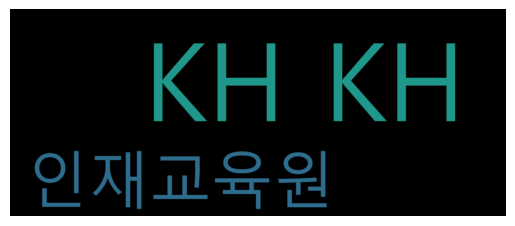

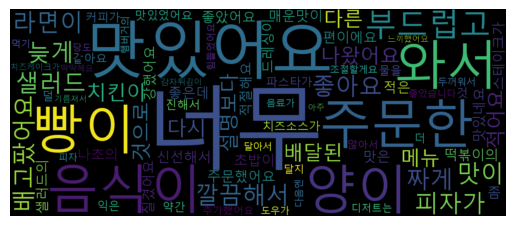

In [8]:
display_word_cloud('KH 인재교육원 KH KH KH KH KH KH KH KH')
display_word_cloud(' '.join(corpus))


### 전처리

In [95]:
df = pd.DataFrame(corpus,columns=['review'])
df.head(2)

,review
0,샐러드 맛이 깔끔해서 좋아요.
1,주문한 음식이 늦게 와서 배고팠어요.


In [96]:
# 한글만 추출하여 새로운 컬럼에 저장
df['review2'] = df['review'].map(extract_korean)
df.head(2)

,review,review2
0,샐러드 맛이 깔끔해서 좋아요.,샐러드 맛이 깔끔해서 좋아요
1,주문한 음식이 늦게 와서 배고팠어요.,주문한 음식이 늦게 와서 배고팠어요


In [105]:
# 형태소 분석
# 형용사,동사,명사, 감탄사 추출
df[['adj','verb','noun','exclamation']] = df['review2'].progress_apply(extract_pos).progress_apply(pd.Series)
df.head(2)

100%|████████████████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 2450.53it/s]


,review,review2,adj,verb,noun,exclamation
0,샐러드 맛이 깔끔해서 좋아요.,샐러드 맛이 깔끔해서 좋아요,깔끔해서 좋아요,NaN,샐러드 맛,NaN
1,주문한 음식이 늦게 와서 배고팠어요.,주문한 음식이 늦게 와서 배고팠어요,배고팠어요,늦게 와서,주문 음식,NaN


In [108]:
# df['review3'] = df[['adj','verb','noun','exclamation']].fillna('')
# df.head(2)
df['review3'] = df[['adj','verb','noun','exclamation']].fillna('').progress_apply(lambda x : ' '.join(x), axis=1)
df.head(2)

100%|███████████████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 22043.64it/s]


,review,review2,adj,verb,noun,exclamation,review3
0,샐러드 맛이 깔끔해서 좋아요.,샐러드 맛이 깔끔해서 좋아요,깔끔해서 좋아요,NaN,샐러드 맛,NaN,깔끔해서 좋아요 샐러드 맛
1,주문한 음식이 늦게 와서 배고팠어요.,주문한 음식이 늦게 와서 배고팠어요,배고팠어요,늦게 와서,주문 음식,NaN,배고팠어요 늦게 와서 주문 음식


In [116]:
df['review3'].to_csv('./data/sns_review.csv', index=False)

In [122]:
df_review = pd.read_csv('./data/sns_review.csv')
df_review.columns=['review']
df_review.head(2)

,review
0,깔끔해서 좋아요 샐러드 맛
1,배고팠어요 늦게 와서 주문 음식


### 문서 벡터화

In [109]:
cvect = CountVectorizer(max_features=30)
tfidvect = TfidfVectorizer(max_features=30)

In [110]:
# x_cvect = cvect.fit(corpus)
# x_tfidvect = tfidvect.fit(corpus)
x_cvect = cvect.fit(df['review3'])
x_tfidvect = tfidvect.fit(df['review3'])

In [111]:
# x_vect_dtm = x_cvect.transform(corpus)
# x_tfidvect_dtm = x_tfidvect.transform(corpus)
x_vect_dtm = x_cvect.transform(df['review3'])
x_tfidvect_dtm = x_tfidvect.transform(df['review3'])

In [112]:
x_vect_dtm, x_tfidvect_dtm

(<22x30 sparse matrix of type '<class 'numpy.int64'>'
 	with 39 stored elements in Compressed Sparse Row format>,
 <22x30 sparse matrix of type '<class 'numpy.float64'>'
 	with 39 stored elements in Compressed Sparse Row format>)

In [113]:
df_x_vect_dtm = pd.DataFrame(x_vect_dtm.toarray(),columns=x_cvect.get_feature_names_out())
display(df_x_vect_dtm.head(2))
df_x_tfidvect_dtm = pd.DataFrame(x_tfidvect_dtm.toarray(),columns=x_tfidvect.get_feature_names_out())
display(df_x_tfidvect_dtm.head(2))

,감자,맛있어요,부드럽고,샐러드,않아서,약간,와서,음료,음식,익은,...,초밥,추가,치즈,치즈케이크,치킨,커피,튀김,파스타,피자,했어요
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


,감자,맛있어요,부드럽고,샐러드,않아서,약간,와서,음료,음식,익은,...,초밥,추가,치즈,치즈케이크,치킨,커피,튀김,파스타,피자,했어요
0,0.0,0.0,0.0,0.661562,0.0,0.0,0.00000,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.57735,0.0,0.57735,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 단어빈도, 단어 중요도 시각화

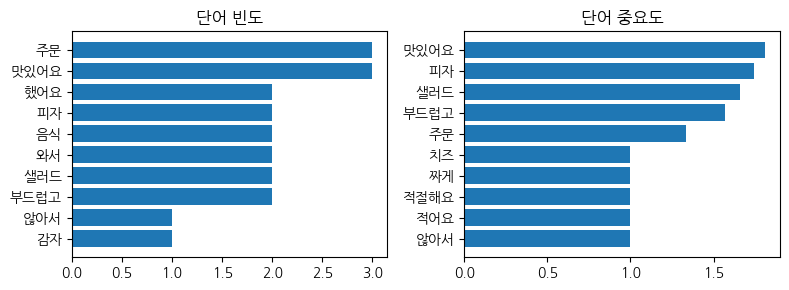

In [114]:
# 바차트로 시각화
fig, axs = plt.subplots(1,2,figsize=(8,3))

# 단어 빈도
word_frequencies = df_x_vect_dtm.sum().nlargest(10).sort_values()
axs[0].barh(word_frequencies.index, word_frequencies.values)
axs[0].set_title('단어 빈도')

# 단어 중요도
word_importances = df_x_tfidvect_dtm.sum().nlargest(10).sort_values()
axs[1].barh(word_importances.index, word_importances.values)
axs[1].set_title('단어 중요도')

plt.tight_layout()
plt.show()

In [115]:
wc_frequencies = display_word_cloud(' '.join(df_x_vect_dtm.columns),dict(word_frequencies))
wc_importances = display_word_cloud(' '.join(df_x_tfidvect_dtm.columns),dict(word_importances))

In [ ]:
# 워드 클라우드로 시각화
fig, axs = plt.subplots(1,2,figsize=(8,3))

# 단어 빈도
axs[0].imshow(wc_frequencies, interpolation='bilinear')
axs[0].set_title('단어 빈도')
axs[0].axis('off') #축 표시 제거

# 단어 중요도
axs[1].imshow(wc_importances, interpolation='bilinear')
axs[1].set_title('단어 중요도')
axs[1].axis('off') #축 표시 제거

# 전체 레이우웃 조정 및 표시
plt.tight_layout()
plt.show()

In [ ]:
# 바차트로 시각화
fig, axs = plt.subplots(2,2,figsize=(10,5))

# 단어 빈도
word_frequencies = df_x_vect_dtm.sum().nlargest(10).sort_values()
axs[0,0].barh(word_frequencies.index, word_frequencies.values)
axs[0,0].set_title('단어 빈도')

# 단어 중요도
word_importances = df_x_tfidvect_dtm.sum().nlargest(10).sort_values()
axs[0,1].barh(word_importances.index, word_importances.values)
axs[0,1].set_title('단어 중요도')

# 워드클라우드 로 시각화
# 단어 빈도
axs[1,0].imshow(wc_frequencies, interpolation='bilinear')
axs[1,0].set_title('단어 빈도')
axs[1,0].axis('off') #축 표시 제거

# 단어 중요도
axs[1,1].imshow(wc_importances, interpolation='bilinear')
axs[1,1].set_title('단어 중요도')
axs[1,1].axis('off') #축 표시 제거

plt.tight_layout()
plt.show()

### 토픽모델링

In [124]:
# 토픽수
n_components = 4
LDA_model = LatentDirichletAllocation(n_components=n_components, random_state=2024)

In [125]:
x_vect_dtm, x_tfidvect_dtm

(<22x30 sparse matrix of type '<class 'numpy.int64'>'
 	with 39 stored elements in Compressed Sparse Row format>,
 <22x30 sparse matrix of type '<class 'numpy.float64'>'
 	with 39 stored elements in Compressed Sparse Row format>)

In [169]:
# 문서-주제
# W = LDA_model.fit(x_vect_dtm).transform(x_vect_dtm)
W = LDA_model.fit(x_vect_dtm).transform(x_tfidvect_dtm)

In [170]:
W

array([[0.10379765, 0.68852097, 0.10383433, 0.10384705],
       [0.09156338, 0.72527129, 0.09157983, 0.0915855 ],
       [0.68278662, 0.103696  , 0.10976868, 0.1037487 ],
       [0.12512247, 0.1250957 , 0.12515801, 0.62462382],
       [0.68789234, 0.10400218, 0.1040482 , 0.10405727],
       [0.12512247, 0.1250957 , 0.12515801, 0.62462382],
       [0.08657715, 0.73815037, 0.0886695 , 0.08660297],
       [0.10365598, 0.10363358, 0.68901442, 0.10369602],
       [0.62440886, 0.12513309, 0.12522038, 0.12523768],
       [0.10372335, 0.68871242, 0.1037734 , 0.10379083],
       [0.62473745, 0.12505936, 0.12509781, 0.12510538],
       [0.25      , 0.25      , 0.25      , 0.25      ],
       [0.12509719, 0.62464237, 0.12512535, 0.12513509],
       [0.12512247, 0.1250957 , 0.12515801, 0.62462382],
       [0.09158806, 0.09157023, 0.09161172, 0.72523   ],
       [0.08348858, 0.0842541 , 0.74873826, 0.08351905],
       [0.12521904, 0.62419109, 0.12528368, 0.12530618],
       [0.10372335, 0.68871242,

In [171]:
# 토픽과 연관되 단어
H = LDA_model.components_
H

array([[1.249474  , 3.24958656, 2.24932412, 0.25028157, 0.25043578,
        0.25007016, 0.25008809, 0.25019458, 0.25008809, 0.25007016,
        0.25024458, 0.25011797, 1.24882276, 0.25019458, 0.25019418,
        0.25019459, 0.25011797, 0.25007724, 0.25005555, 0.25024458,
        0.25019459, 0.25005555, 0.25024458, 1.24966422, 1.24947533,
        0.25005555, 1.249474  , 0.25007016, 1.25718367, 0.25012732],
       [0.25011886, 0.25009048, 0.25015286, 2.24896418, 1.24839429,
        0.25005489, 2.24967224, 1.24928395, 2.24967224, 0.25005489,
        0.2501912 , 0.25009227, 0.25026558, 1.24928395, 1.24928573,
        1.2492839 , 0.25009227, 3.24971095, 0.25004529, 0.2501912 ,
        1.2492839 , 0.25004529, 0.2501912 , 0.25007599, 0.25011866,
        0.25004529, 0.25011886, 0.25005489, 0.25032657, 1.24671096],
       [0.25019598, 0.25016249, 0.25025179, 0.25036305, 0.25056294,
        0.25009036, 0.2501175 , 0.25025099, 0.2501175 , 0.25009036,
        0.25031533, 1.24962602, 0.25043875, 0.

In [172]:
W.shape, H.shape

((22, 4), (4, 30))

In [173]:
df_lda_W_cvect = pd.DataFrame(W)
df_lda_W_cvect['review'] = df_review['review']
df_lda_W_cvect.style.background_gradient(axis=1)

,0,1,2,3,review
0,0.103798,0.688521,0.103834,0.103847,깔끔해서 좋아요 샐러드 맛
1,0.091563,0.725271,0.091580,0.091586,배고팠어요 늦게 와서 주문 음식
2,0.682787,0.103696,0.109769,0.103749,맛있어요 피자
3,0.125122,0.125096,0.125158,0.624624,짜게 나왔어요 라면
4,0.687892,0.104002,0.104048,0.104057,맛있어요 된 배달 치킨
5,0.125122,0.125096,0.125158,0.624624,적어요 메뉴 설명 양
6,0.086577,0.738150,0.088670,0.086603,와서 했어요 주문 음식 다른 것 다시 주문
7,0.103656,0.103634,0.689014,0.103696,좋은데 적은 맛 양 좀 편이
8,0.624409,0.125133,0.125220,0.125238,매운 적절해요 떡볶이 맛
9,0.103723,0.688712,0.103773,0.103791,신선해서 좋았어요 초밥


In [174]:
df_lda_H_cvect = pd.DataFrame(H, columns=x_cvect.get_feature_names_out())
df_lda_H_cvect

,감자,맛있어요,부드럽고,샐러드,않아서,약간,와서,음료,음식,익은,...,초밥,추가,치즈,치즈케이크,치킨,커피,튀김,파스타,피자,했어요
0,1.249474,3.249587,2.249324,0.250282,0.250436,0.250070,0.250088,0.250195,0.250088,0.250070,...,0.250195,0.250056,0.250245,1.249664,1.249475,0.250056,1.249474,0.250070,1.257184,0.250127
1,0.250119,0.250090,0.250153,2.248964,1.248394,0.250055,2.249672,1.249284,2.249672,0.250055,...,1.249284,0.250045,0.250191,0.250076,0.250119,0.250045,0.250119,0.250055,0.250327,1.246711
2,0.250196,0.250162,0.250252,0.250363,0.250563,0.250090,0.250117,0.250251,0.250117,0.250090,...,0.250251,1.249822,0.250315,0.250125,0.250195,1.249822,0.250196,0.250090,1.241908,1.252985
3,0.250211,0.250160,0.250271,0.250391,0.250607,1.249785,0.250122,0.250270,0.250122,1.249785,...,0.250271,0.250077,1.249249,0.250135,0.250211,0.250077,0.250211,1.249785,0.250581,0.250177


In [175]:
df_lda_H_cvect.loc[3].nlargest(10)

약간      1.249785
익은      1.249785
파스타     1.249785
짜게      1.249249
치즈      1.249249
적어요     1.249249
않아서     0.250607
피자      0.250581
적절해요    0.250473
샐러드     0.250391
Name: 3, dtype: float64

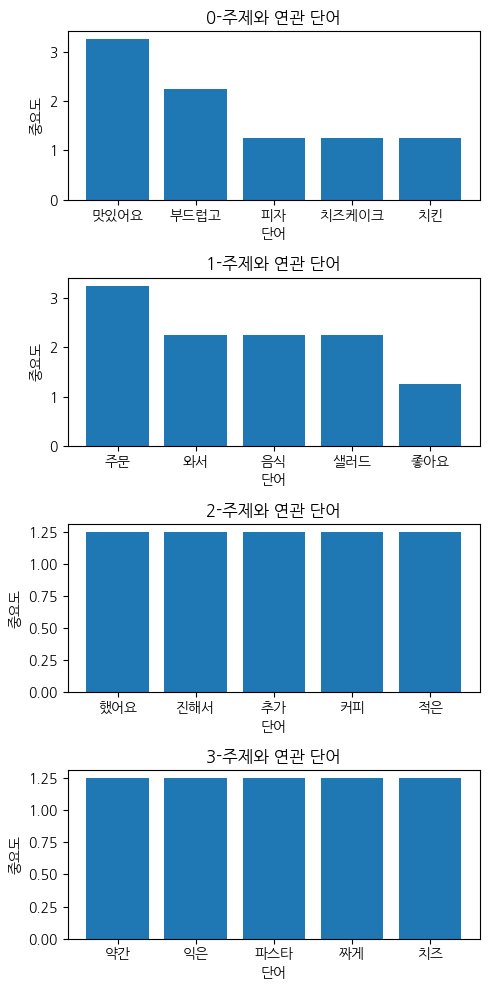

In [190]:
# 바차트로 주제별 주요 단어 시각화하기

n = len(df_lda_H_cvect)
fig, axs = plt.subplots(n ,1,figsize=(5,10))  # 4개 플롯을 수직으로 배열

for i in range(n) :
    data = df_lda_H_cvect.loc[i].nlargest(5)
    axs[i].bar(data.index, data.values)
    axs[i].set_title(f'{i}-주제와 연관 단어')
    axs[i].set_xlabel('단어')
    axs[i].set_ylabel('중요도')
    
plt.tight_layout() #서브 플롯간 간격 조절
plt.show()

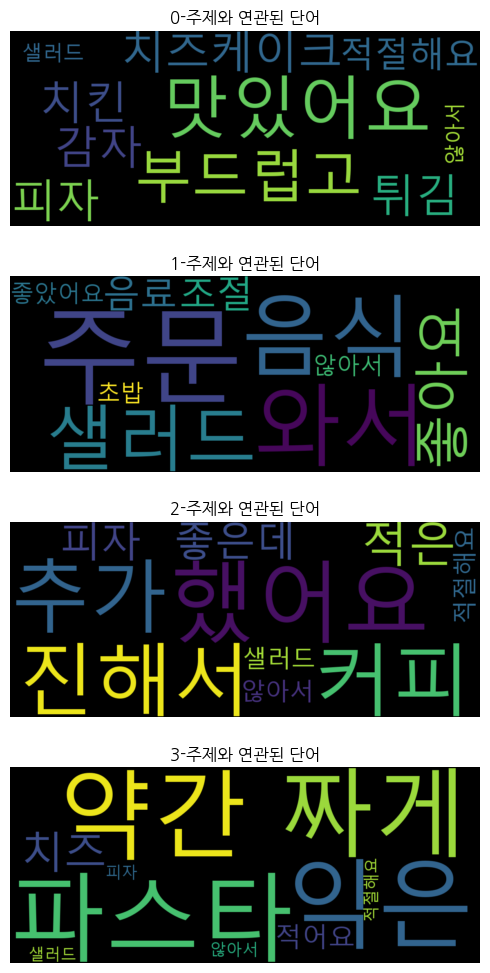

In [196]:
# 클라우드로 주제별 주요 단어 시각화하기

n = len(df_lda_H_cvect)
fig, axs = plt.subplots(n ,1,figsize=(5,10))  # 4개 플롯을 수직으로 배열

for i in range(n) :
    data = df_lda_H_cvect.loc[i].nlargest(10)
    wc_importances = display_word_cloud(' '.join(data.index),dict(data))

    axs[i].imshow(wc_importances, interpolation='bilinear')
    axs[i].set_title(f'{i}-주제와 연관된 단어')
    axs[i].axis('off')  # x, y축 눈금 제거

plt.tight_layout() #서브 플롯간 간격 조절    
plt.show()

### 군집화

* https://scikit-learn.org/stable/modules/clustering.html#k-means
* https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [265]:
n_clusters = 4
kmeans =  KMeans(n_clusters=n_clusters, n_init='auto', random_state=2024)

In [282]:
clusters = kmeans.fit(x_vect_dtm)
clusters

KMeans(n_clusters=4, n_init='auto', random_state=2024)

In [283]:
kmeans.labels_

array([0, 1, 3, 3, 3, 2, 1, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [284]:
df_kmeans = pd.DataFrame()
df_kmeans['review'] = df_review['review']
df_kmeans['label'] = kmeans.labels_

In [285]:
df_kmeans

,review,label
0,깔끔해서 좋아요 샐러드 맛,0
1,배고팠어요 늦게 와서 주문 음식,1
2,맛있어요 피자,3
3,짜게 나왔어요 라면,3
4,맛있어요 된 배달 치킨,3
5,적어요 메뉴 설명 양,2
6,와서 했어요 주문 음식 다른 것 다시 주문,1
7,좋은데 적은 맛 양 좀 편이,3
8,매운 적절해요 떡볶이 맛,3
9,신선해서 좋았어요 초밥,3


In [286]:
df_kmeans['label'].unique()

array([0, 1, 3, 2])

In [287]:
df_kmeans['label'].value_counts()

label
3    17
0     2
1     2
2     1
Name: count, dtype: int64

In [273]:
x_vect_dtm.shape

(22, 30)

In [297]:
# 차원축소
n_components = 2
tsne = TSNE(n_components=n_components, perplexity=10, random_state=2024, init='random')
tsne_result = tsne.fit_transform(x_vect_dtm)

In [300]:
df_tsne = pd.DataFrame(tsne_result, columns=['x','y'])
df_tsne['review'] = df_review['review']
df_tsne['label'] = kmeans.labels_
df_tsne

,x,y,review,label
0,43.069557,49.240334,깔끔해서 좋아요 샐러드 맛,0
1,77.920128,-35.737385,배고팠어요 늦게 와서 주문 음식,1
2,-54.932930,-19.250139,맛있어요 피자,3
3,-25.298189,41.232124,짜게 나왔어요 라면,3
4,47.855377,4.136630,맛있어요 된 배달 치킨,3
5,0.496547,-13.339218,적어요 메뉴 설명 양,2
6,77.951035,-52.580166,와서 했어요 주문 음식 다른 것 다시 주문,1
7,-59.484867,47.812725,좋은데 적은 맛 양 좀 편이,3
8,15.947728,9.601726,매운 적절해요 떡볶이 맛,3
9,-74.921074,11.768075,신선해서 좋았어요 초밥,3


In [304]:
# 팔레트 확인
# plt.colormaps()

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viridis_r',
 'cividis_r',
 'twilight_r',
 'twilight

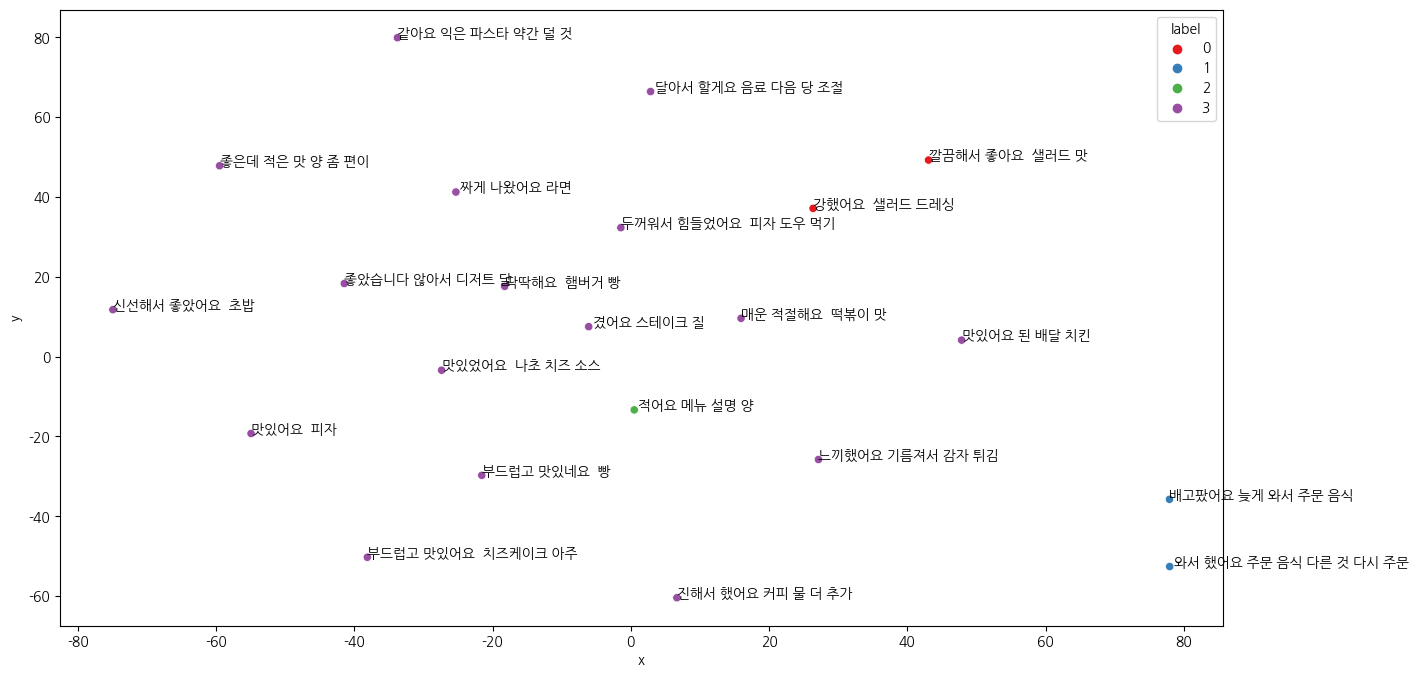

In [312]:
# 2차원 산점도 시각화
plt.figure(figsize=(15,8))
sns.scatterplot(data=df_tsne, x='x', y='y', hue='label', palette='Set1')

for i in df_tsne.index :
    plt.text(x=df_tsne.loc[i,'x'], y=df_tsne.loc[i,'y'], s=df_tsne.loc[i,'review'])